The dataset we will be using is the Top Spotify Songs dataset from Kaggle found at https://www.kaggle.com/datasets/arnavvvvv/spotify-music?resource=download

We will begin preparing our dataset by doing the following steps:

- Preprocessing stap 1 Dimensie en beschrijvende statistieken van de dataset analyseren (shape, describe).
- Preprocessing stap 2 Lege/null waarden aanvullen of verwijderen.
- Preprocessing stap 3 Foutieve data en uitschieters verwijderen.
- Preprocessing stap 4 One-hot-encoding toepassen waar nodig.


- Plot 1 Heatmap om verbanden vast te stellen
- Plot 2 Scatterplot van populariteit per maand en-/of dag van release
- Plot 3 Histplot van populariteit per artiest/lied
- Plot 4 Scatterplot van populariteit van artiest op Spotify tegenover Apple

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

Preprocessing

Stap 1: Dimensie en bescrhijvende statistieken van de dataset analyseren (shape, describe)

In [2]:
# dataset inlezen
dataset = pd.read_csv('Popular_Spotify_Songs.csv', encoding='latin-1') # encoding='latin-1' toegevoegd om error te voorkomen
dataset.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [3]:
# hiermee krijgen we te zien hoeveel rijen en kolommen er in de dataset zitten
dataset.shape

(953, 24)

In [4]:
# dit geeft ons handige informatie over de dataset
dataset.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [5]:
# met deze code kunnen we zien of er lege waardes in de dataset zitten
dataset.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Stap 2: Lege/null waarden aanvullen of verwijderen.

In [7]:
# dropping the in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts column
dataset.drop(['in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts'], axis=1, inplace=True)

Stap 3: Foutieve data en uitschieters verwijderen.

Stap 4: One-hot-encoding toepassen waar nodig.

Plotten

Plot 1: Heatmap om verbanden vast te stellen

C:\Users\victo\AppData\Local\Temp\ipykernel_23500\1030355138.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, fmt=".2f")


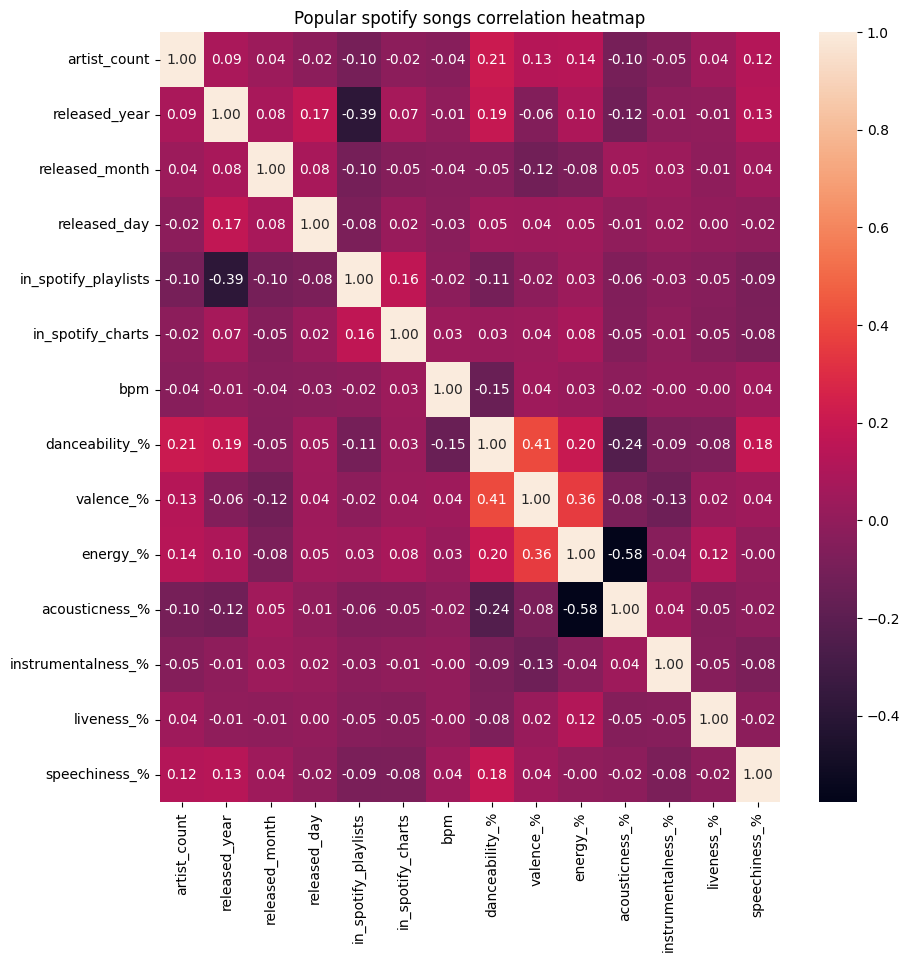

In [8]:
# om makkelijk verbanden te kunnen zien tussen de verschillende kolommen, maken we een heatmap
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True, fmt=".2f")
plt.title("Popular spotify songs correlation heatmap")
plt.show()

Plot 2: Scatterplot van populariteit per maand en-/of dag van release

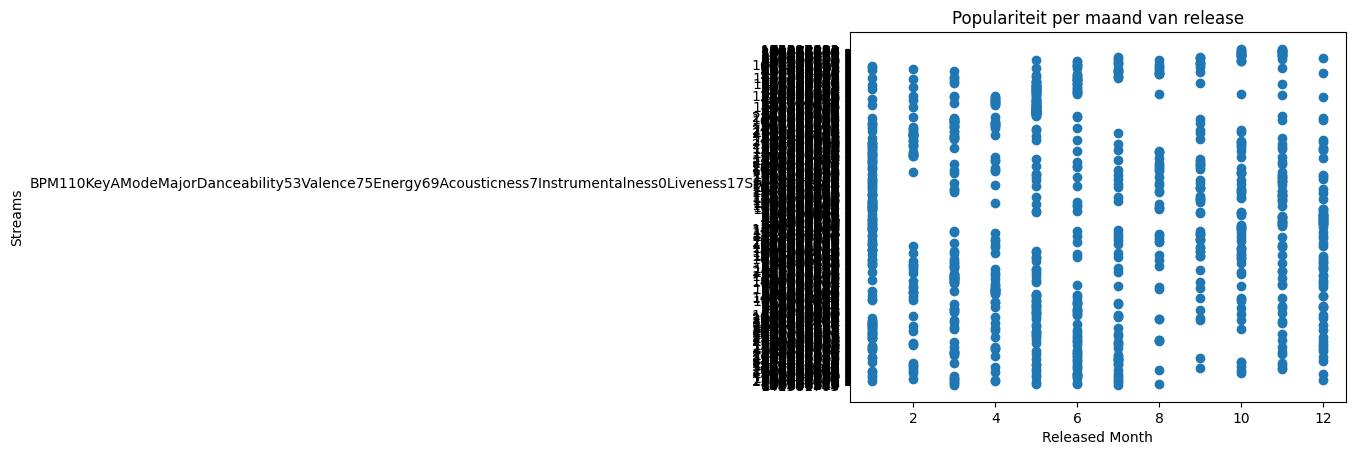

In [10]:
# een scatterplot om populariteit per maand van release te zien (populariteit is hier het aantal streams)
plt.scatter(dataset['released_month'], dataset['streams'])
plt.xlabel('Released Month')
plt.ylabel('Streams')
plt.title('Populariteit per maand van release')
plt.show()

Plot 3 Histplot van populariteit per artiest/lied

In [16]:
# Filter the dataset to include only the top 50 popular artists
top_50_artists = dataset.groupby('artist(s)_name')['streams'].sum().astype(int).nlargest(50).index
filtered_dataset = dataset[dataset['artist(s)_name'].isin(top_50_artists)]

# Create the histogram
plt.figure(figsize=(10,10))
plt.hist(filtered_dataset['artist(s)_name'], bins=10)
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Streams')
plt.title('Populariteit per artiest (Top 50)')
plt.show()

OverflowError: Python int too large to convert to C long

Plot 4 Scatterplot van populariteit van artiest op Spotify tegenover Apple